In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("output_micro_scores.csv")

def plot_lines(level_x_data, level: int):
    level_x_data['label'] = level_x_data.apply(
    lambda row: f"{row['prompt_feature']}_n{row['n_shot']}" if row['prompt_feature'] == 'few-shot' else f"{row['prompt_feature']}_r{row['repeat']}",
    axis=1
    )

    # Calculate the average f1_score for each label
    avg_f1_scores= level_x_data.groupby('label')['f1_score'].mean().reset_index().rename(columns={'f1_score': 'avg_f1_score'})

    # Merge the average f1_scores with the original data
    merged_data = pd.merge(level_x_data, avg_f1_scores, on='label')

    # Sort the labels by average f1_score
    sorted_labels = merged_data.groupby('label')['avg_f1_score'].mean().sort_values().index

    # Sort the data by average f1_score for each label
    merged_data_sorted = merged_data.set_index('label').loc[sorted_labels].reset_index()

    # Plotting
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=merged_data_sorted, x='label', y='f1_score', hue='model', marker='o')
    sns.lineplot(data=merged_data_sorted, x='label', y='avg_f1_score', color='black', linestyle='--', label='Average F1 Score')

    # Customize the plot
    plt.xticks(ticks=range(len(sorted_labels)), labels=sorted_labels, rotation=45, ha='right')
    plt.xlabel('Prompt Features and Variations')
    plt.ylabel('F1 Score')
    plt.title(f"F1 Score by Prompt Feature Variations and Model (Level {level}) - Sorted by Average F1 Score")
    plt.legend(title='Model')
    plt.tight_layout()

    # Show plot
    plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1696\3287757493.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_x_data['label'] = level_x_data.apply(


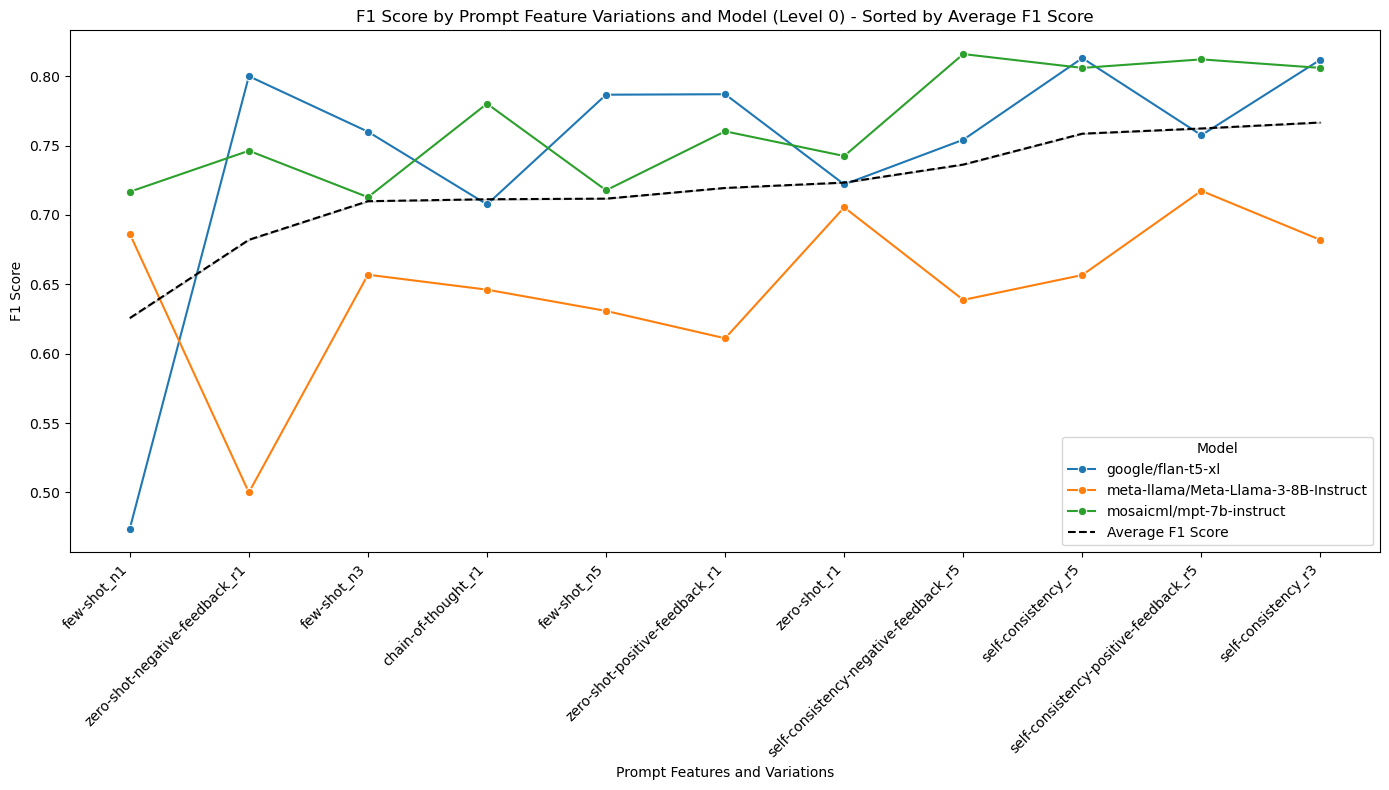

In [2]:
level_data = data[data['level'] == 0]
plot_lines(level_data, 0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1696\3287757493.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_x_data['label'] = level_x_data.apply(


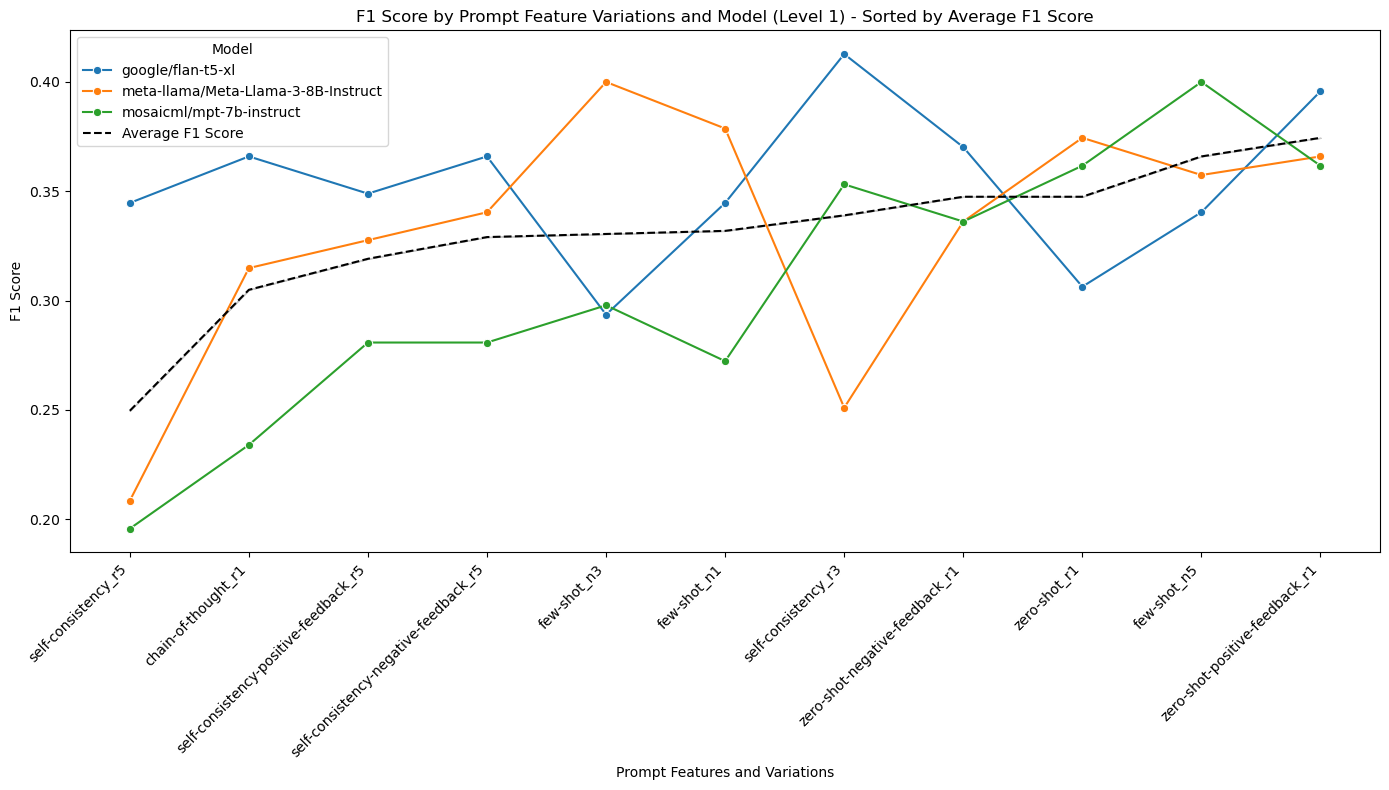

In [3]:
level_data = data[data['level'] == 1]
plot_lines(level_data, 1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1696\3287757493.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_x_data['label'] = level_x_data.apply(


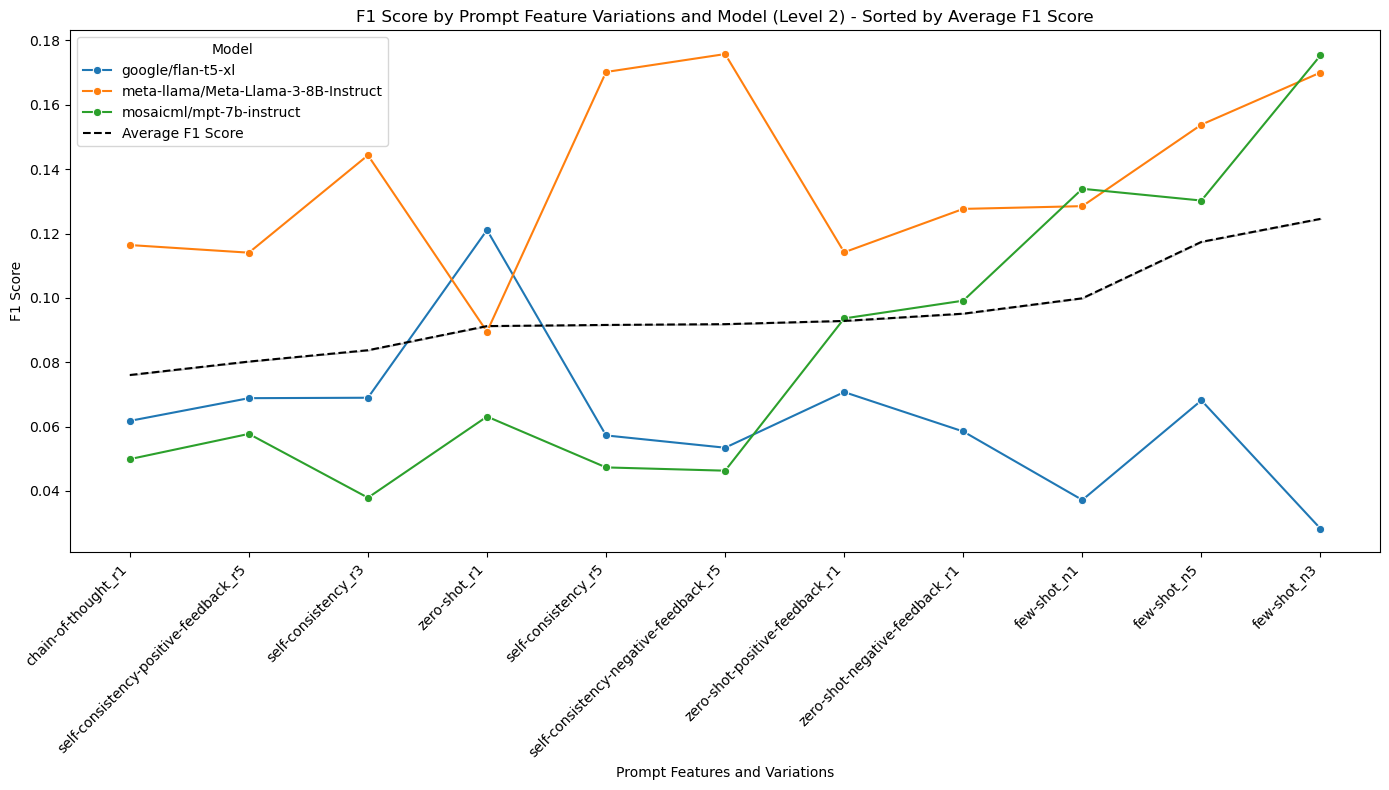

In [4]:
level_data = data[data['level'] == 2]
plot_lines(level_data, 2)